In [1]:
# Importing all necessary modules
from keras.models import Sequential # used to initialize our Neural Network as a sequence of layers or as a graph
from keras.layers import Convolution2D # used to perform the 1st Step of CNN to deal with 2D images (no 3rd time dimension)
from keras.layers import MaxPooling2D # used to perform 2nd Step to add pooling layers
from keras.layers import Flatten # convert all pooled feature maps to 1-D large feature-vector
from keras.layers import Dense # used to add fully connected (hidden) layers in our Classic Neural Network

In [2]:
# --------------------------------------------Initializing the CNN-----------------------------------------
classifier = Sequential() # classifier is an object of the Sequential Class as we r making a classification

In [3]:
# Step 1 - CONVOLUTION
# Try more the size of input image more the accuracy.....
classifier.add(Convolution2D(32,(3,3),strides = (3,3),input_shape=(1000,1000,3),activation='relu')) 
# adding the Convolution Layer by using add method with 'classifier' as object
# 1st Arguement of Convolution 2D() is no. of Feature Detectors i.e., 32 here
# 2nd and 3rd Arguement of Convolution 2D() are the dimensions of Feature Detector (r x c)
# 4th Arguement of Convolution2D() is the input_shape i.e., the image input shape (r x c x 1) for grayscale
# 5th Arguement of Convolution2D() is the activation function which is the ReLU

In [4]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2,2))) # here pool_size is the dimension of the Max-Pooling-Stride
# WE CAN ADD A 2ND CONVOLUTIONAL LAYER:
classifier.add(Convolution2D(32,(3,3),strides = (3,3),activation='relu')) # as we have previously input dimension...keras recognizes
#Again Pooling:
classifier.add(MaxPooling2D(pool_size=(2,2)))
# WE CAN ADD A 3RD CONVOLUTIONAL LAYER:
classifier.add(Convolution2D(32,(3,3),strides = (3,3),activation='relu')) # as we have previously input dimension...keras recognizes
#Again Pooling:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
# As the high nos. in the Pooling Layer represent the Spatial Structure of the image, we r not at all losing any of them in flattening step
# CNN (better) vs ANN as in CNN pays special attention to certain important/differentiable features of the image that ANN does not
# i.e., in ANN we do not get any info about how a pixel is spatially connected to all other pixels of the image
# each node of the Flattened layer represent information regarding a specific feature/detail of an input image 

# Step 3 - Flattening
classifier.add(Flatten())

In [6]:
import numpy as np
X = np.ones((30, 512))

In [9]:
import os
import cv2

k = 0
dr_path = '../dataset/HRF/diabetic_retinopathy/'
h_path = '../dataset/HRF/healthy/'
for i in range(1,13):
    img = cv2.imread(os.path.join(dr_path, "%02d_dr.jpg" % i))
    img=cv2.resize(img,(1000,1000))
    img=np.divide(img,255)
    img=img.reshape(1,1000,1000,3)
    X[i-1] = classifier.predict(img)
    k = k + 1

In [11]:
for i in range(1,13):
    img = cv2.imread(os.path.join(h_path, "%02d_h.jpg" % i))
    img=cv2.resize(img,(1000,1000))
    img=np.divide(img,255)
    img=img.reshape(1,1000,1000,3)
    X[k] = classifier.predict(img)
    k = k + 1

In [12]:
for i in range(13,16):
    img = cv2.imread(os.path.join(dr_path, "%02d_dr.jpg" % i))
    img=cv2.resize(img,(1000,1000))
    img=np.divide(img,255)
    img=img.reshape(1,1000,1000,3)
    X[k] = classifier.predict(img)
    k = k + 1

In [14]:
for i in range(13,16):
    img = cv2.imread(os.path.join(h_path, "%02d_h.jpg" % i))
    img=cv2.resize(img,(1000,1000))
    img=np.divide(img,255)
    img=img.reshape(1,1000,1000,3)
    X[k] = classifier.predict(img)
    k = k + 1

In [15]:
y = np.ones(30)

y[0:12] = 1
y[12:24] = 0
y[24:27] = 1
y[27:30] = 0 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=9876)

a = [None]*512

a = X_test[4]
a = list(a)
X_test[4] = X_train[3]
X_train[3]= np.array(a)
a = y_test[4]
y_test[4] = y_train[3]
y_train[3]= np.array(a)

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(kernel = 'sigmoid')
parameters = {'C':[0.1,1,10,100,1000,10000,100000]}
grid_search = GridSearchCV(param_grid = parameters, estimator = model, verbose = 3)

In [20]:
grid_search = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.400, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.400, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.400, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.400, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.500, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.400, total=   0.0s
[CV] C=1 .............................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [24]:
print("Validation Accuracy:",grid_search.score(X_test,y_test))
print("Training Accuracy:  ",grid_search.score(X_train, y_train))

Validation Accuracy: 0.5
Training Accuracy:   0.75


In [25]:
grid_search.predict(X_test)

array([1., 0., 1., 0., 1., 1.])

In [26]:
y_test

array([1., 1., 0., 0., 1., 0.])

In [27]:
if not os.path.exists('output'):
    os.makedirs('output')

In [28]:
# serialize model to JSON
model_json = classifier.to_json()

In [29]:
with open("./output/new_CDR_BEST.json", "w") as json_file:
    json_file.write(model_json)

In [30]:
# serialize weights to HDF5
classifier.save_weights("./output/new_cdr.h5")

In [31]:
grid_search.best_params_

{'C': 100}

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
predictions=grid_search.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1 2]
 [1 2]]


              precision    recall  f1-score   support

         0.0       0.50      0.33      0.40         3
         1.0       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



In [39]:
#scores = [x[1] for x in grid_search.grid_scores_]

# grid_scores_ has been replaced by cv_result_
scores = grid_search.cv_results_['mean_test_score']

In [40]:
scores = np.array(scores).reshape(7)

Text(0.5, 1.0, 'Grid-Search -> Mean_Score VS C')

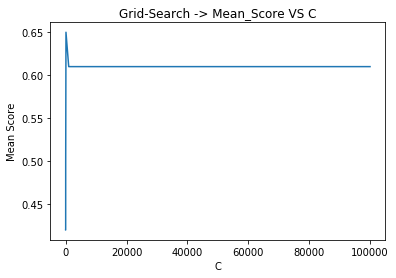

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

C = [0.1,1,10,100,1000,10000,100000]

plt.plot(C,scores)

plt.xlabel('C')
plt.ylabel('Mean Score')
plt.title("Grid-Search -> Mean_Score VS C")

In [42]:
# MODULE FOR CONFUSION MATRIX

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1 2]
 [1 2]]


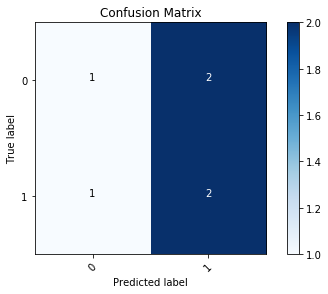

In [43]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, grid_search.predict(X_test)), classes=[0,1], normalize=False,
                      title='Confusion Matrix')

In [44]:
from sklearn.externals import joblib
joblib.dump(grid_search, "./output/grid_search.pkl")

/Users/zmx/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['./output/grid_search.pkl']

In [45]:
from keras.models import model_from_json
json_file = open("./output/new_CDR_BEST.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
classifier = model_from_json(loaded_model_json)
# load weights into new model
classifier.load_weights("./output/new_cdr.h5")